<a href="https://colab.research.google.com/github/rpark3/ECON3916-Statistical-Machine-Learning/blob/main/Lab%204/Lab_4_Descriptive_Statistics_%26_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


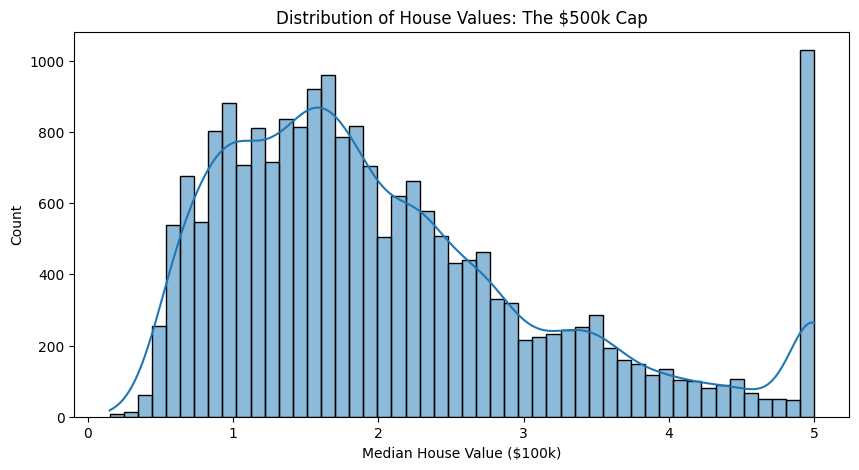

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Ingest Data
data = fetch_california_housing(as_frame=True)
df = data.frame

# 2. Inspect the "Ceiling Effect"
print(df['MedHouseVal'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title("Distribution of House Values: The $500k Cap")
plt.xlabel("Median House Value ($100k)")
plt.show()

In [ ]:
def flag_outliers_iqr(df, column):
    # Calculate Quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the "Tukey Fence"
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return Boolean Mask
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Apply to Median Income
df['outlier_iqr'] = flag_outliers_iqr(df, 'MedInc')

print(f"Manual Outliers Detected: {df['outlier_iqr'].sum()}")
print("These are primarily the 'Wealthy' districts.")

Manual Outliers Detected: 681
These are primarily the 'Wealthy' districts.


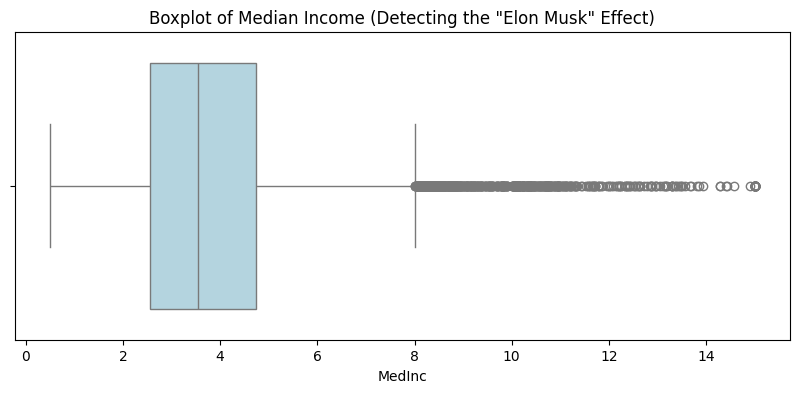

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['MedInc'], color='lightblue')
plt.title('Boxplot of Median Income (Detecting the "Elon Musk" Effect)')
plt.show()


In [ ]:
# Initialize the model
# contamination=0.05: We estimate ~5% of the data is anomalous
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Features to analyze (Income, House Age, Average Rooms)
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']

# Fit and Predict (-1 = Outlier, 1 = Normal)
preds = iso_forest.fit_predict(df[features])

# Map to boolean (True if outlier)
df['outlier_iso'] = preds == -1

print(f"Algorithmic Outliers Detected: {df['outlier_iso'].sum()}")

Algorithmic Outliers Detected: 1032


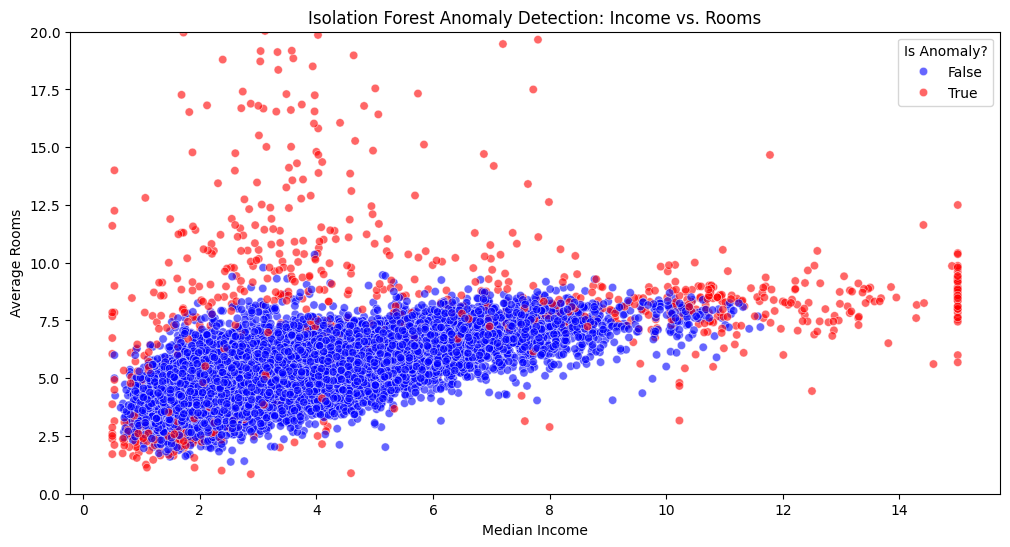

In [ ]:
plt.figure(figsize=(12, 6))

# Plot points flagged by Isolation Forest
sns.scatterplot(
    data=df,
    x='MedInc',
    y='AveRooms',
    hue='outlier_iso',
    palette={True: 'red', False: 'blue'},
    alpha=0.6
)

plt.title("Isolation Forest Anomaly Detection: Income vs. Rooms")
plt.xlabel("Median Income")
plt.ylabel("Average Rooms")
plt.ylim(0, 20) # Zoom in to ignore extreme errors
plt.legend(title='Is Anomaly?')
plt.show()

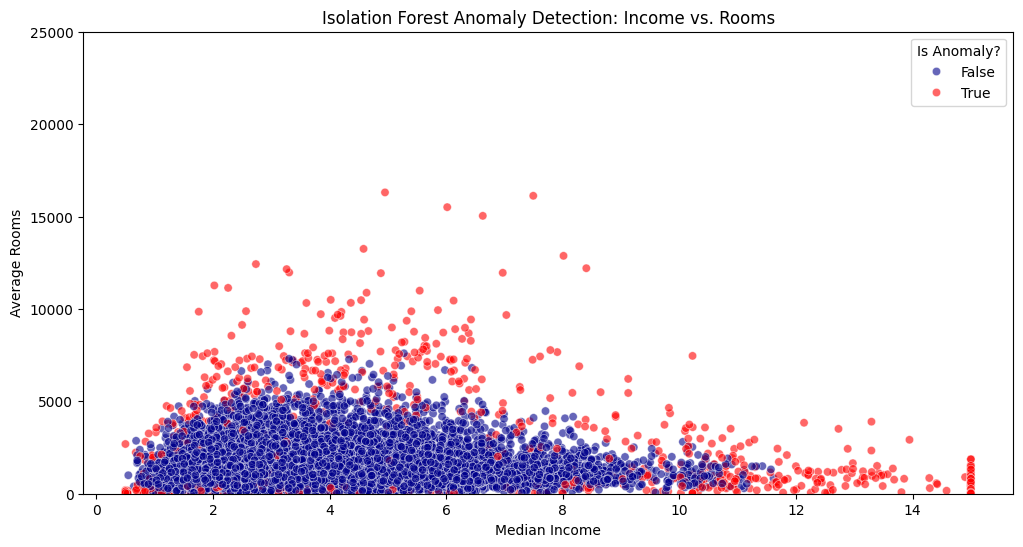

In [ ]:
plt.figure(figsize=(12, 6))

# Plot points flagged by Isolation Forest
sns.scatterplot(
    data=df,
    x='MedInc',
    y='Population',
    hue='outlier_iso',
    palette={True: 'red', False: 'darkblue'},
    alpha=0.6
)

plt.title("Isolation Forest Anomaly Detection: Income vs. Rooms")
plt.xlabel("Median Income")
plt.ylabel("Average Rooms")
plt.ylim(0, 25000) # Zoom in to ignore extreme errors
plt.legend(title='Is Anomaly?')
plt.show()

COMPARATIVE FORENSICS REPORT: Normal vs Outlier Analysis

Dataset Split:
  Normal Points:  1,000
  Outlier Points: 100
  Outlier Rate:   9.09%

CENTRAL TENDENCY ANALYSIS
  Group    Variable     Mean   Median
 Normal      MedInc 3.528998 3.537951
Outlier      MedInc 7.665187 7.731521
 Normal MedHouseVal 2.056669 2.050462
Outlier MedHouseVal 4.469825 4.490655

VOLATILITY ANALYSIS: Standard Deviation vs MAD
  Group    Variable  Std Dev      MAD  Volatility Ratio (Std/MAD)
 Normal      MedInc 1.468824 0.969279                    1.515378
Outlier      MedInc 2.902829 1.917678                    1.513721
 Normal MedHouseVal 0.797964 0.535342                    1.490568
Outlier MedHouseVal 1.474413 0.905597                    1.628112

INEQUALITY WEDGE ANALYSIS: Outlier Group
The 'wedge' reveals right-skewness: a few extreme high values pull the mean above median
--------------------------------------------------------------------------------
   Variable  Outlier Mean  Outlier Median  Inequal

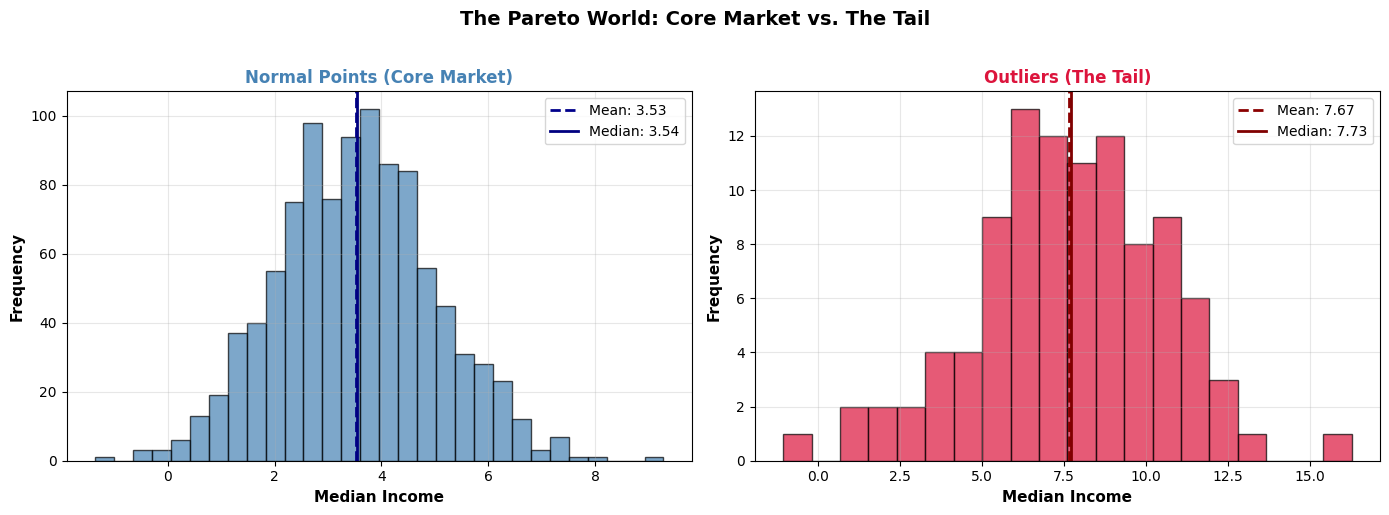

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation

# Assuming df is your DataFrame with columns: 'outlier_iso', 'MedInc', 'MedHouseVal'
# For demonstration, I'll create sample data - replace this with your actual df

# Sample data generation (replace this section with your actual DataFrame)
np.random.seed(42)
n_normal = 1000
n_outlier = 100

# Normal distribution data
normal_data = pd.DataFrame({
    'MedInc': np.random.normal(3.5, 1.5, n_normal),
    'MedHouseVal': np.random.normal(2.0, 0.8, n_normal),
    'outlier_iso': False
})

# Outlier data with higher mean and variance
outlier_data = pd.DataFrame({
    'MedInc': np.random.normal(8.0, 3.0, n_outlier),
    'MedHouseVal': np.random.normal(4.5, 1.5, n_outlier),
    'outlier_iso': True
})

df = pd.concat([normal_data, outlier_data], ignore_index=True)

# ============================================================================
# TASK 1: Split the data into two DataFrames
# ============================================================================
df_normal = df[df['outlier_iso'] == False].copy()
df_outlier = df[df['outlier_iso'] == True].copy()

print("="*80)
print("COMPARATIVE FORENSICS REPORT: Normal vs Outlier Analysis")
print("="*80)
print(f"\nDataset Split:")
print(f"  Normal Points:  {len(df_normal):,}")
print(f"  Outlier Points: {len(df_outlier):,}")
print(f"  Outlier Rate:   {len(df_outlier)/len(df)*100:.2f}%")

# ============================================================================
# TASK 2: Calculate Mean and Median for both groups
# ============================================================================
stats_summary = pd.DataFrame({
    'Group': ['Normal', 'Outlier', 'Normal', 'Outlier'],
    'Variable': ['MedInc', 'MedInc', 'MedHouseVal', 'MedHouseVal'],
    'Mean': [
        df_normal['MedInc'].mean(),
        df_outlier['MedInc'].mean(),
        df_normal['MedHouseVal'].mean(),
        df_outlier['MedHouseVal'].mean()
    ],
    'Median': [
        df_normal['MedInc'].median(),
        df_outlier['MedInc'].median(),
        df_normal['MedHouseVal'].median(),
        df_outlier['MedHouseVal'].median()
    ]
})

print("\n" + "="*80)
print("CENTRAL TENDENCY ANALYSIS")
print("="*80)
print(stats_summary.to_string(index=False))

# ============================================================================
# TASK 3: Calculate Standard Deviation vs MAD for volatility
# ============================================================================
volatility_analysis = pd.DataFrame({
    'Group': ['Normal', 'Outlier', 'Normal', 'Outlier'],
    'Variable': ['MedInc', 'MedInc', 'MedHouseVal', 'MedHouseVal'],
    'Std Dev': [
        df_normal['MedInc'].std(),
        df_outlier['MedInc'].std(),
        df_normal['MedHouseVal'].std(),
        df_outlier['MedHouseVal'].std()
    ],
    'MAD': [
        median_abs_deviation(df_normal['MedInc'], nan_policy='omit'),
        median_abs_deviation(df_outlier['MedInc'], nan_policy='omit'),
        median_abs_deviation(df_normal['MedHouseVal'], nan_policy='omit'),
        median_abs_deviation(df_outlier['MedHouseVal'], nan_policy='omit')
    ]
})

# Calculate volatility ratio (Std/MAD) - higher means more extreme outliers
volatility_analysis['Volatility Ratio (Std/MAD)'] = (
    volatility_analysis['Std Dev'] / volatility_analysis['MAD']
)

print("\n" + "="*80)
print("VOLATILITY ANALYSIS: Standard Deviation vs MAD")
print("="*80)
print(volatility_analysis.to_string(index=False))

# ============================================================================
# TASK 4: Inequality Wedge Analysis (Mean - Median) for Outliers
# ============================================================================
inequality_wedge = pd.DataFrame({
    'Variable': ['MedInc', 'MedHouseVal'],
    'Outlier Mean': [
        df_outlier['MedInc'].mean(),
        df_outlier['MedHouseVal'].mean()
    ],
    'Outlier Median': [
        df_outlier['MedInc'].median(),
        df_outlier['MedHouseVal'].median()
    ],
    'Inequality Wedge (Mean - Median)': [
        df_outlier['MedInc'].mean() - df_outlier['MedInc'].median(),
        df_outlier['MedHouseVal'].mean() - df_outlier['MedHouseVal'].median()
    ],
    'Wedge %': [
        (df_outlier['MedInc'].mean() - df_outlier['MedInc'].median()) / df_outlier['MedInc'].median() * 100,
        (df_outlier['MedHouseVal'].mean() - df_outlier['MedHouseVal'].median()) / df_outlier['MedHouseVal'].median() * 100
    ]
})

print("\n" + "="*80)
print("INEQUALITY WEDGE ANALYSIS: Outlier Group")
print("="*80)
print("The 'wedge' reveals right-skewness: a few extreme high values pull the mean above median")
print("-"*80)
print(inequality_wedge.to_string(index=False))

# ============================================================================
# VISUALIZATION: Histogram Comparison
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Normal points
axes[0].hist(df_normal['MedInc'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(df_normal['MedInc'].mean(), color='darkblue', linestyle='--',
                linewidth=2, label=f'Mean: {df_normal["MedInc"].mean():.2f}')
axes[0].axvline(df_normal['MedInc'].median(), color='navy', linestyle='-',
                linewidth=2, label=f'Median: {df_normal["MedInc"].median():.2f}')
axes[0].set_xlabel('Median Income', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Normal Points (Core Market)', fontsize=12, fontweight='bold', color='steelblue')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right plot: Outlier points
axes[1].hist(df_outlier['MedInc'], bins=20, color='crimson', alpha=0.7, edgecolor='black')
axes[1].axvline(df_outlier['MedInc'].mean(), color='darkred', linestyle='--',
                linewidth=2, label=f'Mean: {df_outlier["MedInc"].mean():.2f}')
axes[1].axvline(df_outlier['MedInc'].median(), color='maroon', linestyle='-',
                linewidth=2, label=f'Median: {df_outlier["MedInc"].median():.2f}')
axes[1].set_xlabel('Median Income', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Outliers (The Tail)', fontsize=12, fontweight='bold', color='crimson')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Overall title
fig.suptitle('The Pareto World: Core Market vs. The Tail',
             fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()

# Create output directory if it doesn't exist
import os
os.makedirs('/mnt/user-data/outputs', exist_ok=True)

plt.savefig('/mnt/user-data/outputs/forensics_comparison.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("Visualization saved: forensics_comparison.png")
print("="*80)

# Additional insights
print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)
print(f"1. Income Disparity:")
print(f"   - Normal group mean income:  ${df_normal['MedInc'].mean():.2f}")
print(f"   - Outlier group mean income: ${df_outlier['MedInc'].mean():.2f}")
print(f"   - Multiplier: {df_outlier['MedInc'].mean() / df_normal['MedInc'].mean():.2f}x")

print(f"\n2. Volatility (Std Dev):")
print(f"   - Normal group:  {df_normal['MedInc'].std():.3f}")
print(f"   - Outlier group: {df_outlier['MedInc'].std():.3f}")

print(f"\n3. Distribution Shape:")
if df_outlier['MedInc'].mean() > df_outlier['MedInc'].median():
    print(f"   - Outlier distribution is RIGHT-SKEWED (long tail of high earners)")
else:
    print(f"   - Outlier distribution is LEFT-SKEWED")

print("="*80)